# Coca-Cola Balance Sheet Analysis (2013- 2023)

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import openpyxl
import io

In [2]:
# Function to load and read the Excel files
def load_balance_sheet(url, sheet_name):
    try:
        df = pd.read_excel(io=url, sheet_name=sheet_name)
        return df
    except Exception as e:
        print(f"Error loading data from {url}: {e}")
        return None

In [3]:
# URLs and parameters for each year
urls = {
    "2014": {
        "url": 'https://s3.amazonaws.com/content.stockpr.com/sec/0000021344-15-000005/Financial_Report.xlsx',
        "sheet_name": 3
    },
    "2015": {
        "url": 'https://s3.amazonaws.com/content.stockpr.com/sec/0000021344-16-000050/Financial_Report.xlsx',
        "sheet_name": 3
    },
    "2017": {
        "url": 'https://s3.amazonaws.com/content.stockpr.com/sec/0000021344-18-000008/Financial_Report.xlsx',
        "sheet_name": 4
    },
    "2019": {
        "url": 'https://s3.amazonaws.com/content.stockpr.com/sec/0000021344-20-000006/Financial_Report.xlsx',
        "sheet_name": 3
    },
    "2021": {
        "url": 'https://s3.amazonaws.com/content.stockpr.com/sec/0000021344-22-000009/Financial_Report.xlsx',
        "sheet_name": 4
    },
    "2023": {
        "url": 'https://content.equisolve.net/sec/0000021344-24-000009/Financial_Report.xlsx',
        "sheet_name": 4
    }
}

In [4]:
# Initializes a dictionary to store the dataframes
dataframes = {}

# Loops through the URLs and load the data
for year, params in urls.items():
    print(f"Loading data for year {year}...")
    df = load_balance_sheet(params["url"], params["sheet_name"])
    if df is not None:
        dataframes[year] = df
        print(f"Data for {year}:")
        print(df.head(3))
    else:
        print(f"Failed to load data for {year}")

# Display the keys of the dataframes dictionary to ensure all data has been loaded
print("\nKeys of dataframes dictionary:")
print(dataframes.keys())

Loading data for year 2014...
Data for 2014:
       CONSOLIDATED BALANCE SHEETS (USD $)  Dec. 31, 2014  Dec. 31, 2013
0  In Millions, unless otherwise specified            NaN            NaN
1                           CURRENT ASSETS            NaN            NaN
2                Cash and cash equivalents         8958.0        10414.0
Loading data for year 2015...
Data for 2015:
  CONSOLIDATED BALANCE SHEETS - USD ($) $ in Millions  Dec. 31, 2015  \
0                                     CURRENT ASSETS             NaN   
1                          Cash and cash equivalents          7309.0   
2                             Short-term investments          8322.0   

   Dec. 31, 2014  
0            NaN  
1         8958.0  
2         9052.0  
Loading data for year 2017...
Data for 2017:
  CONSOLIDATED BALANCE SHEETS - USD ($) $ in Millions  Dec. 31, 2017  \
0                                     CURRENT ASSETS             NaN   
1                          Cash and cash equivalents          60

In [6]:
# Renaming of the 'Income statement' dataframes
dataframes['2014'].drop([0], inplace=True)
dataframes['2014'].drop(['Dec. 31, 2014'], axis=1, inplace=True)
dataframes['2014'].rename(columns={"CONSOLIDATED BALANCE SHEETS (USD $)":"description"}, inplace=True)

dataframes['2015'].rename(columns={"CONSOLIDATED BALANCE SHEETS - USD ($) $ in Millions":"description"}, inplace=True)

dataframes['2017'].rename(columns={"CONSOLIDATED BALANCE SHEETS - USD ($) $ in Millions":"description"}, inplace=True)

dataframes['2019'].rename(columns={"CONSOLIDATED BALANCE SHEETS - USD ($) $ in Millions":"description"}, inplace=True)

dataframes['2021'].rename(columns={"CONSOLIDATED BALANCE SHEETS - USD ($) $ in Millions":"description"}, inplace=True)

dataframes['2023'].rename(columns={"CONSOLIDATED BALANCE SHEETS - USD ($) $ in Millions":"description"}, inplace=True)


# Print the first 3 rows to verify the changes
print(dataframes['2014'].head(3))
print(dataframes['2015'].head(3))
print(dataframes['2017'].head(3))
print(dataframes['2019'].head(3))
print(dataframes['2021'].head(3))
print(dataframes['2023'].head(3))

                 description  Dec. 31, 2013
1             CURRENT ASSETS            NaN
2  Cash and cash equivalents        10414.0
3     Short-term investments         6707.0
                 description  Dec. 31, 2015  Dec. 31, 2014
0             CURRENT ASSETS            NaN            NaN
1  Cash and cash equivalents         7309.0         8958.0
2     Short-term investments         8322.0         9052.0
                 description  Dec. 31, 2017  Dec. 31, 2016
0             CURRENT ASSETS            NaN            NaN
1  Cash and cash equivalents         6006.0         8555.0
2     Short-term investments         9352.0         9595.0
                 description  Dec. 31, 2019  Dec. 31, 2018
0             CURRENT ASSETS            NaN            NaN
1  Cash and cash equivalents         6480.0         9077.0
2     Short-term investments         1467.0         2025.0
                 description  Dec. 31, 2021  Dec. 31, 2020
0             CURRENT ASSETS            NaN            Na

In [12]:
# Standardizing description mapping
description_mapping = {
    'CURRENT ASSETS': 'Current Assets',
    'Cash and cash equivalents': 'cash and cash equivalents',
    'Short-term investments': 'Short-term investments',
    'TOTAL CASH, CASH EQUIVALENTS AND SHORT-TERM INVESTMENTS': 'Total Cash, Cash Equivalents, and Short-Term Investments',
    'Total Cash, Cash Equivalents and Short-Term Investments': 'Total Cash, Cash Equivalents, and Short-Term Investments',
    'Marketable securities': 'Marketable Securities',
    'Trade accounts receivable, less allowances of $331 and $61, respectively': 'Trade Accounts Receivable, less allowances',
    'Trade accounts receivable, less allowances of $352 and $331, respectively': 'Trade Accounts Receivable, less allowances',
    'Trade accounts receivable, less allowances of $477 and $466, respectively': 'Trade Accounts Receivable, less allowances',
    'Trade accounts receivable, less allowances of $516 and $526, respectively': 'Trade Accounts Receivable, less allowances',
    'Trade accounts receivable,less allowances of $502 and $516, respectively': 'Trade Accounts Receivable, less allowances',
    'Trade accounts receivable,less allowances of $524 and $501, respectively': 'Trade Accounts Receivable, less allowances',
    'Inventories': 'Inventories',
    'Prepaid expenses and other assets': 'Prepaid Expenses and Other Current Assets',
    'Prepaid expenses and other current assets': 'Prepaid Expenses and Other Current Assets',
    'TOTAL CURRENT ASSETS': 'Total Current Assets',
    'Total Current Assets': 'Total Current Assets',
    'EQUITY METHOD INVESTMENTS': 'Equity Method Investments',
    'Equity method investments': 'Equity method investments',
    'OTHER INVESTMENTS': 'Other Investments',
    'Other investments': 'Other investments',
    'OTHER ASSETS': 'Other noncurrent assets',
    'Other noncurrent assets': 'Other noncurrent assets',
    'Assets held for sale': 'Assets Held for Sale',
    'Assets held for sale - discontinuing operati,ons': 'Assets Held for Sale - Discontinued Operations',
    'Property, plant and equipment — net': 'Property, Plant, and Equipment',
    'PROPERTY, PLANT AND EQUIPMENT - net': 'Property, Plant, and Equipment',
    'Trademarks with indefinite lives': 'Trademarks with Indefinite Lives',
    'TRADEMARKS WITH INDEFINITE LIVES': 'Trademarks with Indefinite Lives',
    'GOODWILL': 'Goodwill',
    'Goodwill': 'Goodwill',
    "BOTTLERS' FRANCHISE RIGHTS WITH INDEFINITE LIVES": "Bottlers' Franchise Rights with Indefinite Lives",
    'Deferred Tax Assets, Net, Noncurrent': 'Deferred Income Tax Assets',
    'Deferred income tax assets':'Deferred Income Tax Assets',
    'OTHER INTANGIBLE ASSETS': 'Other Intangible Assets',
    'Other intangible assets': 'Other Intangible Assets',
    'TOTAL ASSETS': 'Total Assets',
    'Total Assets': 'Total Assets',
    'CURRENT LIABILITIES': 'Current Liabilities', 
    'Accounts payable and accrued expenses': 'Accounts Payable and Accrued Expenses',
    'Loans and notes payable': 'Loans and Notes Payable',
    'Notes and Loans Payable, Current': 'Loans and Notes Payable',
    'Current maturities of long-term debt': 'Current Maturities of Long-Term Debt',
    'Accrued income taxes': 'Accrued Income Taxes',
    'Liabilities held for sale': 'Liabilities Held for Sale',
    'Liabilities Held for Sale, Discontinued Operations': 'Liabilities Held for Sale - Discontinued Operations',
    'TOTAL CURRENT LIABILITIES': 'Total Current Liabilities', 
    'Total Current Liabilities': 'Total Current Liabilities',
    'LONG-TERM DEBT': 'Long-Term Debt',
    'Long-term debt': 'Long-Term Debt',
    'Deferred income tax liabilities': 'Deferred Income Tax Liabilities',
    'DEFERRED INCOME TAXES': 'Deferred Income Tax Liabilities',
    'Other noncurrent liabilities': 'Other Noncurrent Liabilities',
    'OTHER LIABILITIES': 'Other Noncurrent Liabilities',
    'Common stock, $0.25 par value; authorized — 11,200 shares; issued — 7,040 shares': 'Common Stock',
    'Common stock, $0.25 par value; Authorized — 11,200 shares; Issued — 7,040 and 7,040 shares, respectively': 'Common Stock',
    'Common stock, $0.25 par value; Authorized â€” 11,200 shares; Issued â€” 7,040 and 7,040 shares, respectively': 'Common Stock',
    "THE COCA-COLA COMPANY SHAREOWNERS' EQUITY": "The Coca-Cola Company Shareowners' Equity",
    'Capital surplus': 'Capital Surplus',
    'Reinvested earnings': 'Retained Earnings',
    'Accumulated other comprehensive income (loss)': 'Accumulated Other Comprehensive Income',
    'Treasury stock, at cost â€” 2,674 and 2,638 shares, respectively': 'Treasury Stock',
    'Treasury stock, at cost — 2,716 and 2,674 shares, respectively': 'Treasury Stock',
    'Treasury stock, at cost\xa0— 2,715 and 2,738 shares, respectively': 'Treasury Stock',
    'Treasury stock, at cost — 2,760 and 2,772 shares, respectively': 'Treasury Stock',
    'Treasury stock, at cost — 2,781 and 2,752 shares, respectively': 'Treasury Stock',
    'EQUITY ATTRIBUTABLE TO SHAREOWNERS OF THE COCA-COLA COMPANY': 'Equity Attributable to Shareowners of The Coca-Cola Company',
    'Equity Attributable to Shareowners of The Coca-Cola Company': 'Equity Attributable to Shareowners of The Coca-Cola Company',
    'EQUITY ATTRIBUTABLE TO NONCONTROLLING INTERESTS': 'Equity Attributable to Noncontrolling Interests',
    'Equity attributable to noncontrolling interests':'Equity Attributable to Noncontrolling Interests',
    'TOTAL EQUITY': 'Total Equity',
    'Total Equity': 'Total Equity',
    'TOTAL LIABILITIES AND EQUITY': 'Total Liabilities and Equity',
    'Total Liabilities and Equity': 'Total Liabilities and Equity'
}

#'Common stock, $0.25 par value; authorized\xa0— 11,200\xa0shares; issued\xa0— 7,040\xa0shares': 'Common Stock',
#'Treasury stock, at cost\xa0— 2,732 and 2,712 shares, respectively': 'Treasury Stock',

In [13]:
# Simplify and standardize the 'description' terms
def cleaned_description(df):
    if 'description' in df.columns:
        df['description'] = df['description'].str.lower().replace(description_mapping)
    return df

# Apply the cleaned description to each 'income statement' dataFrame
dataframes['2014'] = cleaned_description(dataframes['2014'])
dataframes['2015'] = cleaned_description(dataframes['2015'])
dataframes['2017'] = cleaned_description(dataframes['2017'])
dataframes['2019'] = cleaned_description(dataframes['2019'])
dataframes['2021'] = cleaned_description(dataframes['2021'])
dataframes['2023'] = cleaned_description(dataframes['2023'])


# Display the head of the 'income statement' DataFrames to verify the changes
print("2014 Balance Sheet:")
print(dataframes['2014'].head(3))

print("\n2015 Balance Sheet:")
print(dataframes['2015'].head(3))

print("\n2017 Balance Sheet:")
print(dataframes['2017'].head(3))

print("\n2019 Balance Sheet:")
print(dataframes['2019'].head(3))

print("\n2021 Balance Sheet:")
print(dataframes['2021'].head(3))

print("\n2023 Balance Sheet:")
print(dataframes['2023'].head(3))

2014 Balance Sheet:
                 description  Dec. 31, 2013
1             current assets            NaN
2  cash and cash equivalents        10414.0
3     short-term investments         6707.0

2015 Balance Sheet:
                 description  Dec. 31, 2015  Dec. 31, 2014
0             current assets            NaN            NaN
1  cash and cash equivalents         7309.0         8958.0
2     short-term investments         8322.0         9052.0

2017 Balance Sheet:
                 description  Dec. 31, 2017  Dec. 31, 2016
0             current assets            NaN            NaN
1  cash and cash equivalents         6006.0         8555.0
2     short-term investments         9352.0         9595.0

2019 Balance Sheet:
                 description  Dec. 31, 2019  Dec. 31, 2018
0             current assets            NaN            NaN
1  cash and cash equivalents         6480.0         9077.0
2     short-term investments         1467.0         2025.0

2021 Balance Sheet:
            

In [14]:
# Merge the DataFrames based on the 'description' column
balance_sheet = dataframes['2023'].merge(dataframes['2021'], on='description', how='left')
balance_sheet = balance_sheet.merge(dataframes['2019'], on='description', how='left')
balance_sheet = balance_sheet.merge(dataframes['2017'], on='description', how='left')
balance_sheet = balance_sheet.merge(dataframes['2015'], on='description', how='left')
balance_sheet = balance_sheet.merge(dataframes['2014'], on='description', how='left')

# Display the head of the merged DataFrame to verify the merge
balance_sheet.head()

,description,"Dec. 31, 2023","Dec. 31, 2022","Dec. 31, 2021","Dec. 31, 2020","Dec. 31, 2019","Dec. 31, 2018","Dec. 31, 2017","Dec. 31, 2016","Dec. 31, 2015","Dec. 31, 2014","Dec. 31, 2013"
0,current assets,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,cash and cash equivalents,9366,9519,9684.0,6795.0,6480.0,9077.0,6006.0,8555.0,7309.0,8958.0,10414.0
2,short-term investments,2997,1043,1242.0,1771.0,1467.0,2025.0,9352.0,9595.0,8322.0,9052.0,6707.0
3,"total cash, cash equivalents and short-term in...",12363,10562,10926.0,8566.0,7947.0,11102.0,15358.0,18150.0,15631.0,18010.0,17121.0
4,marketable securities,1300,1069,1699.0,2348.0,3228.0,5013.0,5317.0,4051.0,4269.0,3665.0,3147.0


In [15]:
balance_sheet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   description    37 non-null     object 
 1   Dec. 31, 2023  37 non-null     object 
 2   Dec. 31, 2022  37 non-null     object 
 3   Dec. 31, 2021  32 non-null     float64
 4   Dec. 31, 2020  32 non-null     float64
 5   Dec. 31, 2019  24 non-null     float64
 6   Dec. 31, 2018  24 non-null     float64
 7   Dec. 31, 2017  25 non-null     float64
 8   Dec. 31, 2016  25 non-null     float64
 9   Dec. 31, 2015  25 non-null     float64
 10  Dec. 31, 2014  25 non-null     float64
 11  Dec. 31, 2013  25 non-null     float64
dtypes: float64(9), object(3)
memory usage: 3.6+ KB


In [16]:
balance_sheet.description.unique()

array(['current assets', 'cash and cash equivalents',
       'short-term investments',
       'total cash, cash equivalents and short-term investments',
       'marketable securities',
       'trade accounts receivable, less allowances of $502 and $516, respectively',
       'inventories', 'prepaid expenses and other current assets',
       'total current assets', 'equity method investments',
       'other investments', 'other noncurrent assets',
       'deferred income tax assets',
       'property, plant and equipment — net',
       'trademarks with indefinite lives', 'goodwill',
       'other intangible assets', 'total assets', 'current liabilities',
       'accounts payable and accrued expenses', 'loans and notes payable',
       'current maturities of long-term debt', 'accrued income taxes',
       'total current liabilities', 'long-term debt',
       'other noncurrent liabilities', 'deferred income tax liabilities',
       "the coca-cola company shareowners' equity",
       'comm

In [24]:
balance_sheet.isnull().sum()

description       0
Dec. 31, 2023     0
Dec. 31, 2022     0
Dec. 31, 2021     5
Dec. 31, 2020     5
Dec. 31, 2019    13
Dec. 31, 2018    13
Dec. 31, 2017    12
Dec. 31, 2016    12
Dec. 31, 2015    12
Dec. 31, 2014    12
Dec. 31, 2013    12
dtype: int64

In [25]:
balance_sheet = balance_sheet.fillna(0)
balance_sheet.head(5)

,description,"Dec. 31, 2023","Dec. 31, 2022","Dec. 31, 2021","Dec. 31, 2020","Dec. 31, 2019","Dec. 31, 2018","Dec. 31, 2017","Dec. 31, 2016","Dec. 31, 2015","Dec. 31, 2014","Dec. 31, 2013"
0,current assets,,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,cash and cash equivalents,9366,9519,9684.0,6795.0,6480.0,9077.0,6006.0,8555.0,7309.0,8958.0,10414.0
2,short-term investments,2997,1043,1242.0,1771.0,1467.0,2025.0,9352.0,9595.0,8322.0,9052.0,6707.0
3,"total cash, cash equivalents and short-term in...",12363,10562,10926.0,8566.0,7947.0,11102.0,15358.0,18150.0,15631.0,18010.0,17121.0
4,marketable securities,1300,1069,1699.0,2348.0,3228.0,5013.0,5317.0,4051.0,4269.0,3665.0,3147.0


In [38]:
balance_sheet.drop([0, 5, 7, 21, 27, 28, 32, 18], inplace=True)

balance_sheet.shape

(29, 12)

In [39]:
balance_sheet.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, 1 to 36
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   description    29 non-null     object 
 1   Dec. 31, 2023  29 non-null     object 
 2   Dec. 31, 2022  29 non-null     object 
 3   Dec. 31, 2021  29 non-null     float64
 4   Dec. 31, 2020  29 non-null     float64
 5   Dec. 31, 2019  29 non-null     float64
 6   Dec. 31, 2018  29 non-null     float64
 7   Dec. 31, 2017  29 non-null     float64
 8   Dec. 31, 2016  29 non-null     float64
 9   Dec. 31, 2015  29 non-null     float64
 10  Dec. 31, 2014  29 non-null     float64
 11  Dec. 31, 2013  29 non-null     float64
dtypes: float64(9), object(3)
memory usage: 2.9+ KB


In [40]:
balance_sheet.head(30)

,description,"Dec. 31, 2023","Dec. 31, 2022","Dec. 31, 2021","Dec. 31, 2020","Dec. 31, 2019","Dec. 31, 2018","Dec. 31, 2017","Dec. 31, 2016","Dec. 31, 2015","Dec. 31, 2014","Dec. 31, 2013"
1,cash and cash equivalents,9366,9519,9684.0,6795.0,6480.0,9077.0,6006.0,8555.0,7309.0,8958.0,10414.0
2,short-term investments,2997,1043,1242.0,1771.0,1467.0,2025.0,9352.0,9595.0,8322.0,9052.0,6707.0
3,"total cash, cash equivalents and short-term in...",12363,10562,10926.0,8566.0,7947.0,11102.0,15358.0,18150.0,15631.0,18010.0,17121.0
4,marketable securities,1300,1069,1699.0,2348.0,3228.0,5013.0,5317.0,4051.0,4269.0,3665.0,3147.0
6,inventories,4424,4233,3414.0,3266.0,3379.0,3071.0,2655.0,2675.0,2902.0,3100.0,3277.0
8,total current assets,26732,22591,22545.0,19240.0,20411.0,24930.0,36545.0,34010.0,33395.0,32986.0,31304.0
9,equity method investments,19671,18264,17598.0,19273.0,19025.0,19412.0,20856.0,16260.0,12318.0,9947.0,10393.0
10,other investments,118,501,818.0,812.0,854.0,867.0,1096.0,989.0,3470.0,3678.0,1119.0
11,other noncurrent assets,7162,6189,6731.0,6184.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,deferred income tax assets,1561,1746,2129.0,2460.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
mask = balance_sheet["Dec. 31, 2022"] == '\xa0'
rows_with_non_breaking_space = balance_sheet[mask]
print(rows_with_non_breaking_space)

            description Dec. 31, 2023 Dec. 31, 2022  Dec. 31, 2021  \
18  current liabilities                                        0.0   

    Dec. 31, 2020  Dec. 31, 2019  Dec. 31, 2018  Dec. 31, 2017  Dec. 31, 2016  \
18            0.0            0.0            0.0            0.0            0.0   

    Dec. 31, 2015  Dec. 31, 2014  Dec. 31, 2013  
18            0.0            0.0            0.0  


In [41]:
balance_sheet["Dec. 31, 2022"] = balance_sheet["Dec. 31, 2022"].astype(float)
balance_sheet["Dec. 31, 2023"] = balance_sheet["Dec. 31, 2023"].astype(float)


balance_sheet.dtypes

description       object
Dec. 31, 2023    float64
Dec. 31, 2022    float64
Dec. 31, 2021    float64
Dec. 31, 2020    float64
Dec. 31, 2019    float64
Dec. 31, 2018    float64
Dec. 31, 2017    float64
Dec. 31, 2016    float64
Dec. 31, 2015    float64
Dec. 31, 2014    float64
Dec. 31, 2013    float64
dtype: object

In [42]:
# Save DataFrame to CSV file
balance_sheet.to_csv('coca-cola_balance_sheet.csv', index=False)
balance_sheet.to_csv(r'C:\Users\hp\Desktop\dataset\coca-cola_balance_sheet.csv', index=False) 

In [1]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd

In [2]:
df = pd.read_csv('coca-cola_balance_sheet.csv')
df.head()

,description,"Dec. 31, 2023","Dec. 31, 2022","Dec. 31, 2021","Dec. 31, 2020","Dec. 31, 2019","Dec. 31, 2018","Dec. 31, 2017","Dec. 31, 2016","Dec. 31, 2015","Dec. 31, 2014","Dec. 31, 2013"
0,cash and cash equivalents,9366.0,9519.0,9684.0,6795.0,6480.0,9077.0,6006.0,8555.0,7309.0,8958.0,10414.0
1,short-term investments,2997.0,1043.0,1242.0,1771.0,1467.0,2025.0,9352.0,9595.0,8322.0,9052.0,6707.0
2,"total cash, cash equivalents and short-term in...",12363.0,10562.0,10926.0,8566.0,7947.0,11102.0,15358.0,18150.0,15631.0,18010.0,17121.0
3,marketable securities,1300.0,1069.0,1699.0,2348.0,3228.0,5013.0,5317.0,4051.0,4269.0,3665.0,3147.0
4,inventories,4424.0,4233.0,3414.0,3266.0,3379.0,3071.0,2655.0,2675.0,2902.0,3100.0,3277.0


In [3]:
df.rename(columns={'description':'date'}, inplace = True)
df.set_index('date', inplace=True)
df.head(3)

,"Dec. 31, 2023","Dec. 31, 2022","Dec. 31, 2021","Dec. 31, 2020","Dec. 31, 2019","Dec. 31, 2018","Dec. 31, 2017","Dec. 31, 2016","Dec. 31, 2015","Dec. 31, 2014","Dec. 31, 2013"
date,,,,,,,,,,,
cash and cash equivalents,9366.0,9519.0,9684.0,6795.0,6480.0,9077.0,6006.0,8555.0,7309.0,8958.0,10414.0
short-term investments,2997.0,1043.0,1242.0,1771.0,1467.0,2025.0,9352.0,9595.0,8322.0,9052.0,6707.0
"total cash, cash equivalents and short-term investments",12363.0,10562.0,10926.0,8566.0,7947.0,11102.0,15358.0,18150.0,15631.0,18010.0,17121.0


In [4]:
df= df.T # transpose the dataframe

#Convert the index format from 'Dec. 31, 2014' to '2014-12-31'
df.index = pd.to_datetime(df.index).strftime('%Y-%m-%d')

# Sort the index (which is now 'date')
df = df.sort_index()

# Display the modified DataFrame
df.head(2)

date,cash and cash equivalents,short-term investments,"total cash, cash equivalents and short-term investments",marketable securities,inventories,total current assets,equity method investments,other investments,other noncurrent assets,deferred income tax assets,...,long-term debt,other noncurrent liabilities,deferred income tax liabilities,capital surplus,reinvested earnings,accumulated other comprehensive income (loss),equity attributable to shareowners of the coca-cola company,equity attributable to noncontrolling interests,total equity,total liabilities and equity
2013-12-31,10414.0,6707.0,17121.0,3147.0,3277.0,31304.0,10393.0,1119.0,0.0,0.0,...,19154.0,0.0,0.0,12276.0,61660.0,-3432.0,33173.0,267.0,33440.0,90055.0
2014-12-31,8958.0,9052.0,18010.0,3665.0,3100.0,32986.0,9947.0,3678.0,0.0,0.0,...,19063.0,0.0,0.0,13154.0,63408.0,-5777.0,30320.0,241.0,30561.0,92023.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 2013-12-31 to 2023-12-31
Data columns (total 29 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   cash and cash equivalents                                    11 non-null     float64
 1   short-term investments                                       11 non-null     float64
 2   total cash, cash equivalents and short-term investments      11 non-null     float64
 3   marketable securities                                        11 non-null     float64
 4   inventories                                                  11 non-null     float64
 5   total current assets                                         11 non-null     float64
 6   equity method investments                                    11 non-null     float64
 7   other investments                                            11 non-nu

## Exploratory Data Analysis

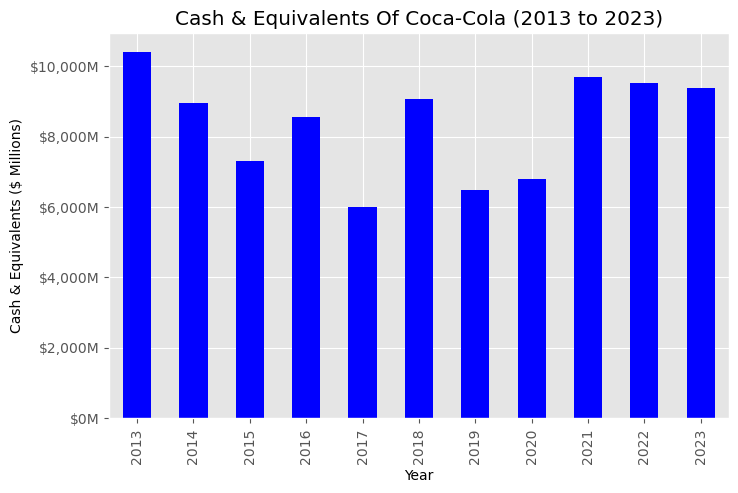

In [9]:
df['cash and cash equivalents'].plot(kind='bar', figsize=(8,5), color='blue')

# Formatting x-axis labels
plt.gca().set_xticklabels([pd.to_datetime(x).strftime('%Y') for x in df.index])

# Formatting y-axis labels to display in millions with '$' prefix
plt.gca().yaxis.set_major_formatter('${:,.0f}M'.format)

# Adding title and labels
plt.title('Cash & Equivalents Of Coca-Cola (2013 to 2023)')
plt.xlabel('Year')
plt.ylabel('Cash & Equivalents ($ Millions)')

plt.show() 

Findings: (Cash & Equivalents) Coca-Cola maintains a healthy level of cash and equivalents, ranging from $6.4 million to $9.6 million throughout the period. This indicates good short-term financial flexibility.

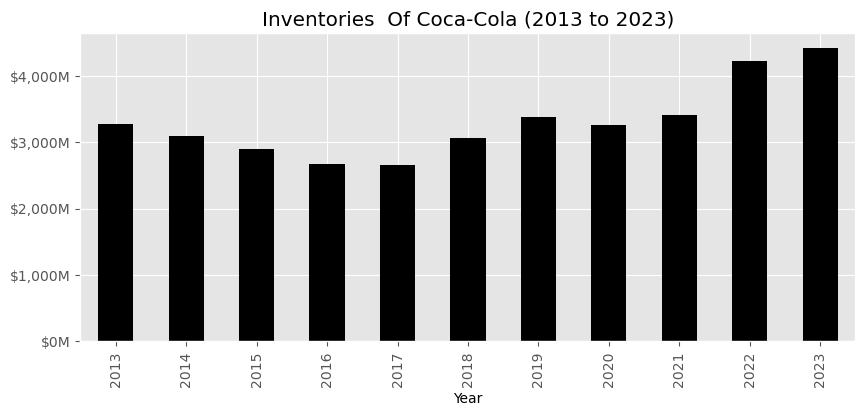

In [11]:
df['inventories'].plot(kind='bar', figsize=(10,4), color='black')

# Formatting x-axis labels
plt.gca().set_xticklabels([pd.to_datetime(x).strftime('%Y') for x in df.index])

# Formatting y-axis labels to display in millions with '$' prefix
plt.gca().yaxis.set_major_formatter('${:,.0f}M'.format)

# Adding title and labels
plt.title('Inventories Of Coca-Cola (2013 to 2023)')
plt.xlabel('Year')

plt.show() 

Findings: Inventory levels appear to be relatively stable, hovering around $2.6 million to $4.4 million. Further analysis is needed to understand inventory turnover and efficiency in managing inventory.


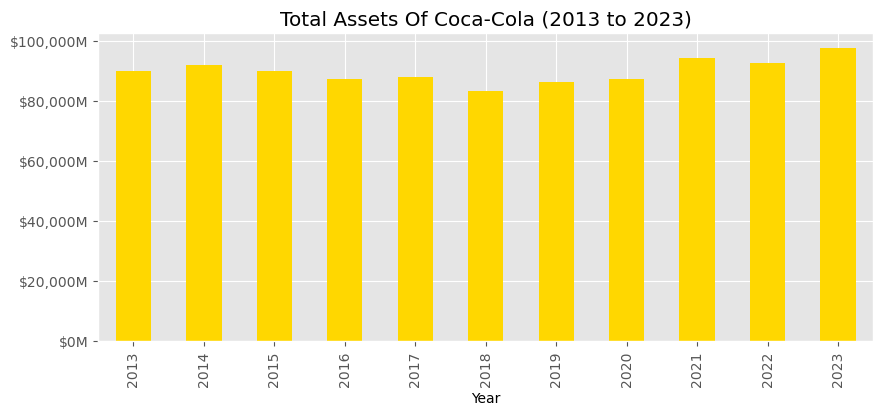

In [12]:
df['total assets'].plot(kind='bar', figsize=(10,4), color='gold')

# Formatting x-axis labels
plt.gca().set_xticklabels([pd.to_datetime(x).strftime('%Y') for x in df.index])

# Formatting y-axis labels to display in millions with '$' prefix
plt.gca().yaxis.set_major_formatter('${:,.0f}M'.format)

# Adding title and labels
plt.title('Total Assets Of Coca-Cola (2013 to 2023)')
plt.xlabel('Year')

plt.show() 

Findings: Total assets show some fluctuations but with an upward trend, reflecting Coca-Cola's overall growth.

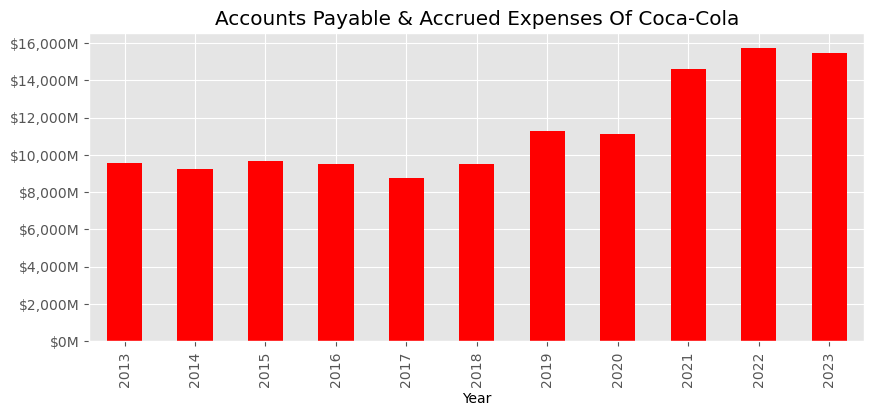

In [15]:
df['accounts payable and accrued expenses'].plot(kind='bar', figsize=(10,4), color='red')
# Formatting x-axis labels
plt.gca().set_xticklabels([pd.to_datetime(x).strftime('%Y') for x in df.index])

# Formatting y-axis labels to display in millions with '$' prefix
plt.gca().yaxis.set_major_formatter('${:,.0f}M'.format)

# Adding title and labels
plt.title('Accounts Payable & Accrued Expenses Of Coca-Cola')
plt.xlabel('Year')

plt.show() 

Findings: The data reveals fluctuations in both accounts payable and accrued expenses over the years.
There's a general upward trend, with 2023 showing the highest amount ($15.4m).

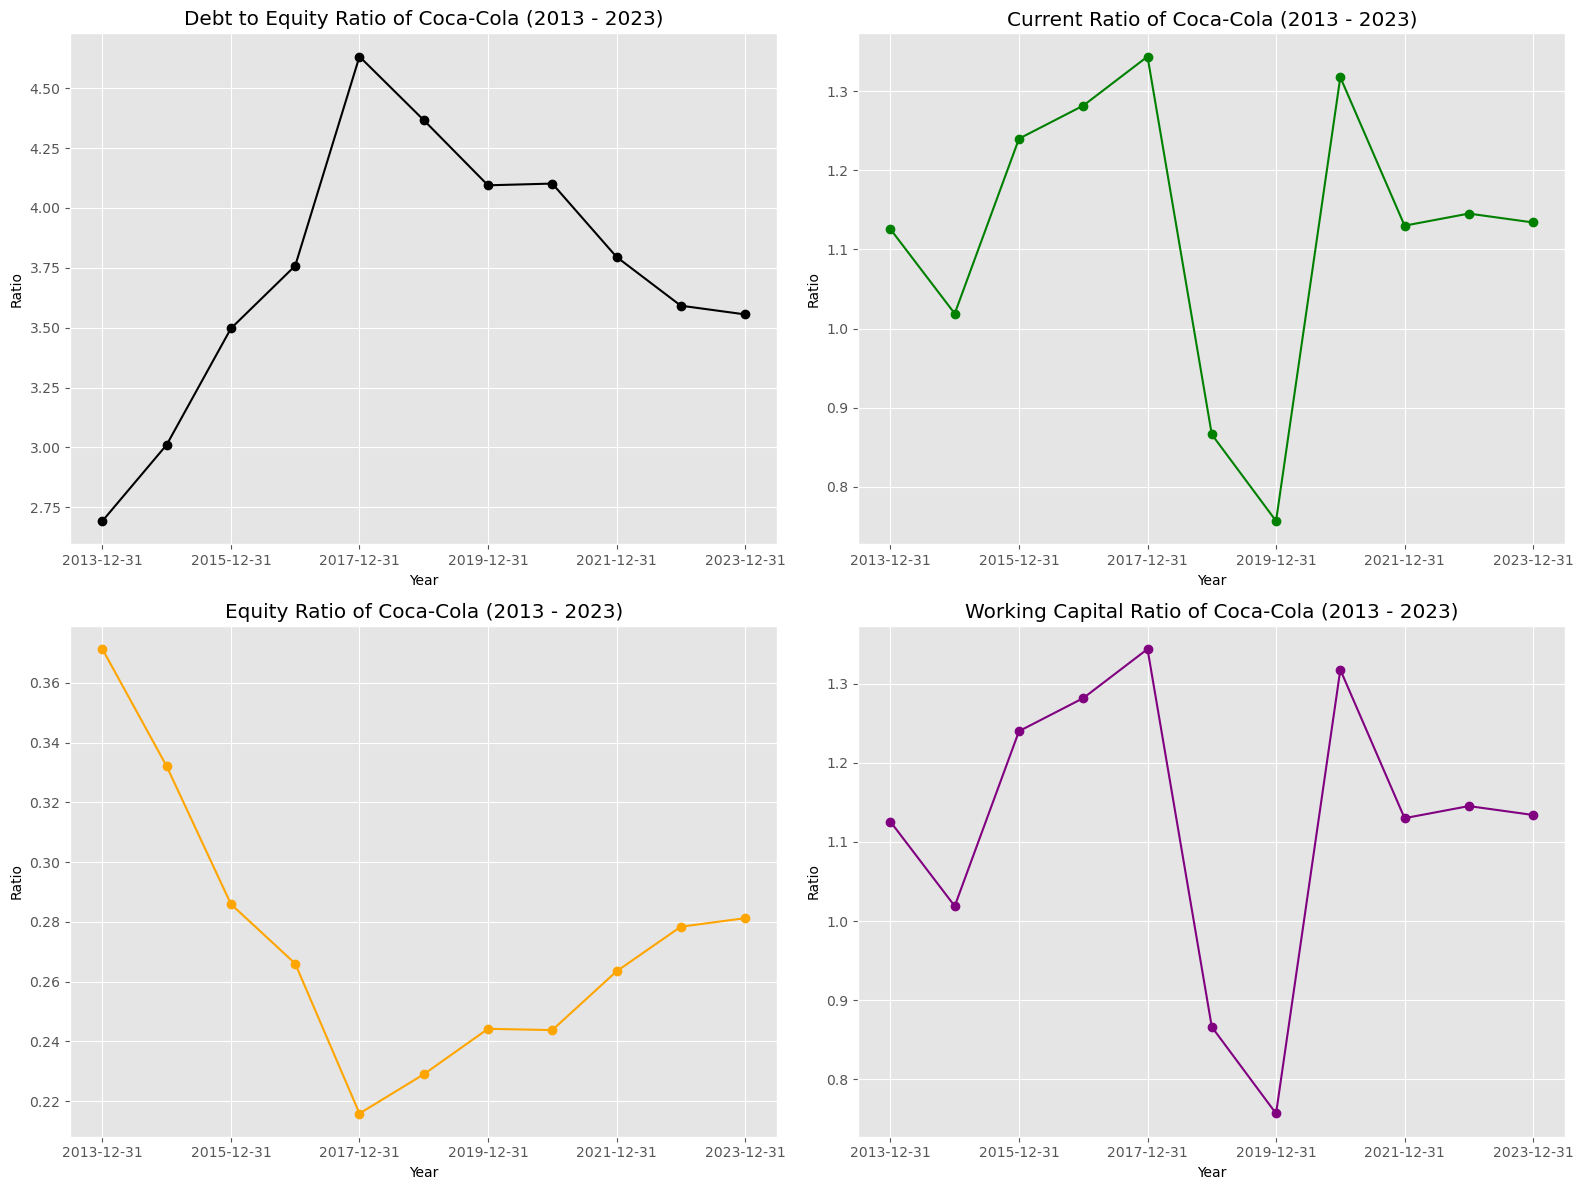

In [19]:
# Calculate some metrics
df['current ratio'] = df['total current assets'] / df['total current liabilities']
df['debt-to-equity ratio'] = df['total liabilities and equity'] / df['total equity']
#df['quick ratio'] = (df['total current assets'] - df['inventories']) / df['total current liabilities']
df['equity ratio'] = df['total equity'] / df['total assets']
df['working capital ratio'] = df['total current assets'] / df['total current liabilities']


# Plotting the metrics
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

# Plot 1: Debt to Equity Ratio
df['debt-to-equity ratio'].plot(kind='line', ax=axes[0, 0], marker='o', color='black')
axes[0, 0].set_title('Debt to Equity Ratio of Coca-Cola (2013 - 2023)')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Ratio')
axes[0, 0].grid(True)

# Plot 2: Quick Ratio
df['current ratio'].plot(kind='line', ax=axes[0, 1], color='green',  marker='o',)
axes[0, 1].set_title('Current Ratio of Coca-Cola (2013 - 2023)')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('Ratio')
axes[0, 1].grid(True)

# Plot 3: Equity Ratio
df['equity ratio'].plot(kind='line', ax=axes[1, 0], marker='o', color='orange')
axes[1, 0].set_title('Equity Ratio of Coca-Cola (2013 - 2023)')
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('Ratio')
axes[1, 0].grid(True)

# Plot 4: Working Capital Ratio
df['working capital ratio'].plot(kind='line', ax=axes[1, 1], marker='o', color='purple')
axes[1, 1].set_title('Working Capital Ratio of Coca-Cola (2013 - 2023)')
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('Ratio')
axes[1, 1].grid(True)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

Intrepretation of Result:
* Debt-to-Equity Ratio (2.69 - 4.63): It indicates how much a company finances its operations with debt compared to shareholder equity. A higher ratio suggests more reliance on debt, which can be risky. Coca-Cola's debt-to-equity ratio has increased over time, reaching a high of 4.63 in 2017. This increase in debt financing should be monitored to ensure it doesn't negatively impact Coca-Cola's financial stability. 


* Current Ratio (1.12 - 1.34): Measures a company's ability to pay short-term obligations (due within a year) using its current assets. A ratio above 1 is generally considered good, and Coca-Cola's numbers throughout the period are well above 1, indicating strong short-term liquidity.

* Equity Ratio (0.21 - 0.28): Measures the proportion of shareholders' equity financing the company's assets. A higher ratio indicates a greater reliance on equity financing, which is generally considered more stable than debt financing. Coca-Cola's equity ratio has remained relatively stable around 0.25, indicating a moderate balance between debt and equity financing.

* Working Capital Ratio (1.01 - 1.34):  Similar to the current ratio but focuses on a company's ability to cover its current liabilities with current assets. It considers inventory, unlike the quick ratio. A ratio above 1 is generally considered positive. Coca-Cola's working capital ratio is consistently above 1, again indicating good short-term liquidity.